In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline

In [1]:
# Galaxy and Star QA plots

In [2]:
tractorfile = '/global/homes/i/ioannis/tractor-sdss-spectro-specObj-dr13.fits'
sdssfile = '/global/homes/i/ioannis/specObj-dr13.fits'

In [3]:
print('Reading {}'.format(tractorfile))
trac = fits.getdata(tractorfile, 1)
print('Reading {}'.format(sdssfile))
sdss = fits.getdata(sdssfile, 1)

Reading /global/homes/i/ioannis/tractor-sdss-spectro-specObj-dr13.fits
Reading /global/homes/i/ioannis/specObj-dr13.fits


In [4]:
print(trac.columns)
print(sdss.columns)

ColDefs(
    name = 'BRICKID'; format = 'J'
    name = 'BRICKNAME'; format = '8A'
    name = 'OBJID'; format = 'J'
    name = 'BRICK_PRIMARY'; format = 'L'
    name = 'BLOB'; format = 'J'
    name = 'NINBLOB'; format = 'I'
    name = 'TYCHO2INBLOB'; format = 'L'
    name = 'TYPE'; format = '4A'
    name = 'RA'; format = 'D'
    name = 'RA_IVAR'; format = 'E'
    name = 'DEC'; format = 'D'
    name = 'DEC_IVAR'; format = 'E'
    name = 'BX'; format = 'E'
    name = 'BY'; format = 'E'
    name = 'BX0'; format = 'E'
    name = 'BY0'; format = 'E'
    name = 'LEFT_BLOB'; format = 'L'
    name = 'OUT_OF_BOUNDS'; format = 'L'
    name = 'DCHISQ'; format = '5E'
    name = 'EBV'; format = 'E'
    name = 'CPU_SOURCE'; format = 'E'
    name = 'CPU_BLOB'; format = 'E'
    name = 'BLOB_WIDTH'; format = 'I'
    name = 'BLOB_HEIGHT'; format = 'I'
    name = 'BLOB_NPIX'; format = 'J'
    name = 'BLOB_NIMAGES'; format = 'I'
    name = 'BLOB_TOTALPIX'; format = 'J'
    name = 'DECAM_FLUX'; format = '6E

In [5]:
match = np.where(trac['RA_IVAR'] > 0)[0]
print('Number of matching sources = {} / {}'.format(len(match), len(trac)))

Number of matching sources = 2094096 / 4411200


(-1.5, 1.5)

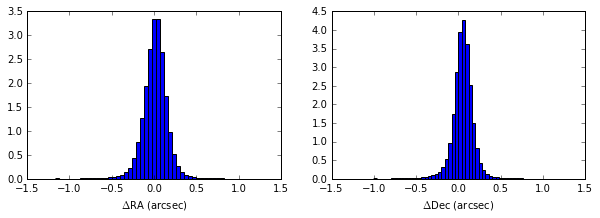

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
_, _, _ = ax1.hist((trac['ra'][match] - sdss['plug_ra'][match])*3600, bins=50, normed=True)
ax1.set_xlabel(r'$\Delta$RA (arcsec)')
ax1.set_xlim(-1.5, 1.5)

_, _, _ = ax2.hist((trac['dec'][match] - sdss['plug_dec'][match])*3600, bins=50, normed=True)
ax2.set_xlabel(r'$\Delta$Dec (arcsec)')
ax2.set_xlim(-1.5, 1.5)

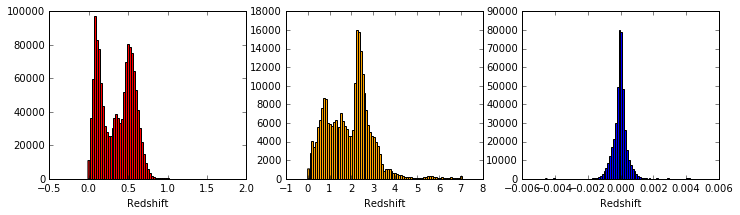

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
for ii, (col, clss) in enumerate(zip(['red', 'orange', 'blue'], ['GALAXY', 'QSO', 'STAR'])):
    these = np.where(sdss['CLASS'][match] == clss)[0]
    ax[ii].hist(sdss['Z'][match][these], color=col, bins=80)
    ax[ii].set_xlabel('Redshift')

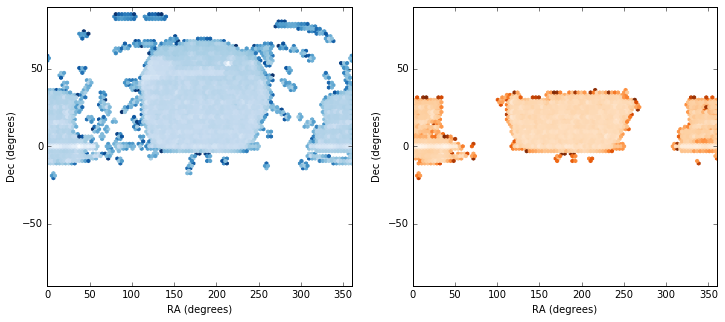

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
im1 = ax1.hexbin(sdss['plug_ra'], sdss['plug_dec'], bins='log', cmap=plt.cm.Blues_r,
               mincnt=1, extent=(0, 360, -90, 90))
ax1.set_ylabel('Dec (degrees)')
ax1.set_xlabel('RA (degrees)')

im2 = ax2.hexbin(trac['ra'][match], trac['dec'][match], bins='log', cmap=plt.cm.Oranges_r,
               mincnt=1, extent=(0, 360, -90, 90))
ax2.set_ylabel('Dec (degrees)')
ax2.set_xlabel('RA (degrees)')

In [ ]:
# QSO QAplots